В данной задаче предстоит моделировать отток клиентов телеком компании.

**train.csv** - содержит колонки признаков и целевую переменную\
**test.csv** - содержит только колонки признаков

В качестве метрики на kaggle используется **ROC-AUC**.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных

1) Изучим данные, распределения категориальных и числовых признаков\
2) Заменим незаполненные значения в данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_csv('./train.csv')
data2 = pd.read_csv('./test.csv')
data = pd.concat([data1, data2], ignore_index=True)
print(data.shape)
data.head(-1)

(7043, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1.0
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0.0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,13,55.15,742.9,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,NaN
7038,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),NaN
7039,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,NaN
7040,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,NaN


Создадим списки категориальных и числовых колонок

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'IsSeniorCitizen'
]

cat_cols = cat_cols = [
    "Sex",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на наличие пустых значений, в т.ч. с учетом тестовых данных

In [ ]:
print(data.isna().mean())
data1.isna().mean()

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.000000
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.250035
dtype: float64


ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

Посмотрим на типы данных в колонках

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              7043 non-null   int64  
 1   MonthlySpending           7043 non-null   float64
 2   TotalSpent                7043 non-null   object 
 3   Sex                       7043 non-null   object 
 4   IsSeniorCitizen           7043 non-null   int64  
 5   HasPartner                7043 non-null   object 
 6   HasChild                  7043 non-null   object 
 7   HasPhoneService           7043 non-null   object 
 8   HasMultiplePhoneNumbers   7043 non-null   object 
 9   HasInternetService        7043 non-null   object 
 10  HasOnlineSecurityService  7043 non-null   object 
 11  HasOnlineBackup           7043 non-null   object 
 12  HasDeviceProtection       7043 non-null   object 
 13  HasTechSupportAccess      7043 non-null   object 
 14  HasOnlin

И на распределения категориальных признаков

In [ ]:
for cols in cat_cols:
  print(f"{cols} DISTRIBUTTION")
  print(data[cols].value_counts())
  print(data.shape)

Sex DISTRIBUTTION
Male      3555
Female    3488
Name: Sex, dtype: int64
(7043, 20)
HasPartner DISTRIBUTTION
No     3641
Yes    3402
Name: HasPartner, dtype: int64
(7043, 20)
HasChild DISTRIBUTTION
No     4933
Yes    2110
Name: HasChild, dtype: int64
(7043, 20)
HasPhoneService DISTRIBUTTION
Yes    6361
No      682
Name: HasPhoneService, dtype: int64
(7043, 20)
HasMultiplePhoneNumbers DISTRIBUTTION
No                  3390
Yes                 2971
No phone service     682
Name: HasMultiplePhoneNumbers, dtype: int64
(7043, 20)
HasInternetService DISTRIBUTTION
Fiber optic    3096
DSL            2421
No             1526
Name: HasInternetService, dtype: int64
(7043, 20)
HasOnlineSecurityService DISTRIBUTTION
No                     3498
Yes                    2019
No internet service    1526
Name: HasOnlineSecurityService, dtype: int64
(7043, 20)
HasOnlineBackup DISTRIBUTTION
No                     3088
Yes                    2429
No internet service    1526
Name: HasOnlineBackup, dtype: int6

Можно заметить, что колонка 'TotalSpent' не переобозначается из object в float. Это связано с тем, что в ней присутсвуют часть пробелов: ' '. В других колонках такого нет.
Найдем эти строки ' ' и изменим их.\
Если посмотреть на строки с ' ' значениями, поймем, что это скорее всего новые клиенты, которые еще не внесли первый платеж/он не отобразился. Поэтому заменим ' ' на 0.

In [ ]:
data1.replace(' ', np.nan, inplace=True)
data2.replace(' ', np.nan, inplace=True)

data1['TotalSpent'] = data1['TotalSpent'].astype(float)
data2['TotalSpent'] = data1['TotalSpent'].astype(float)

data1["TotalSpent"] = data1.TotalSpent.fillna(0).astype(float)
data2["TotalSpent"] = data2.TotalSpent.fillna(0).astype(float)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных

Визуализируем данные (с учетом тестовой части)

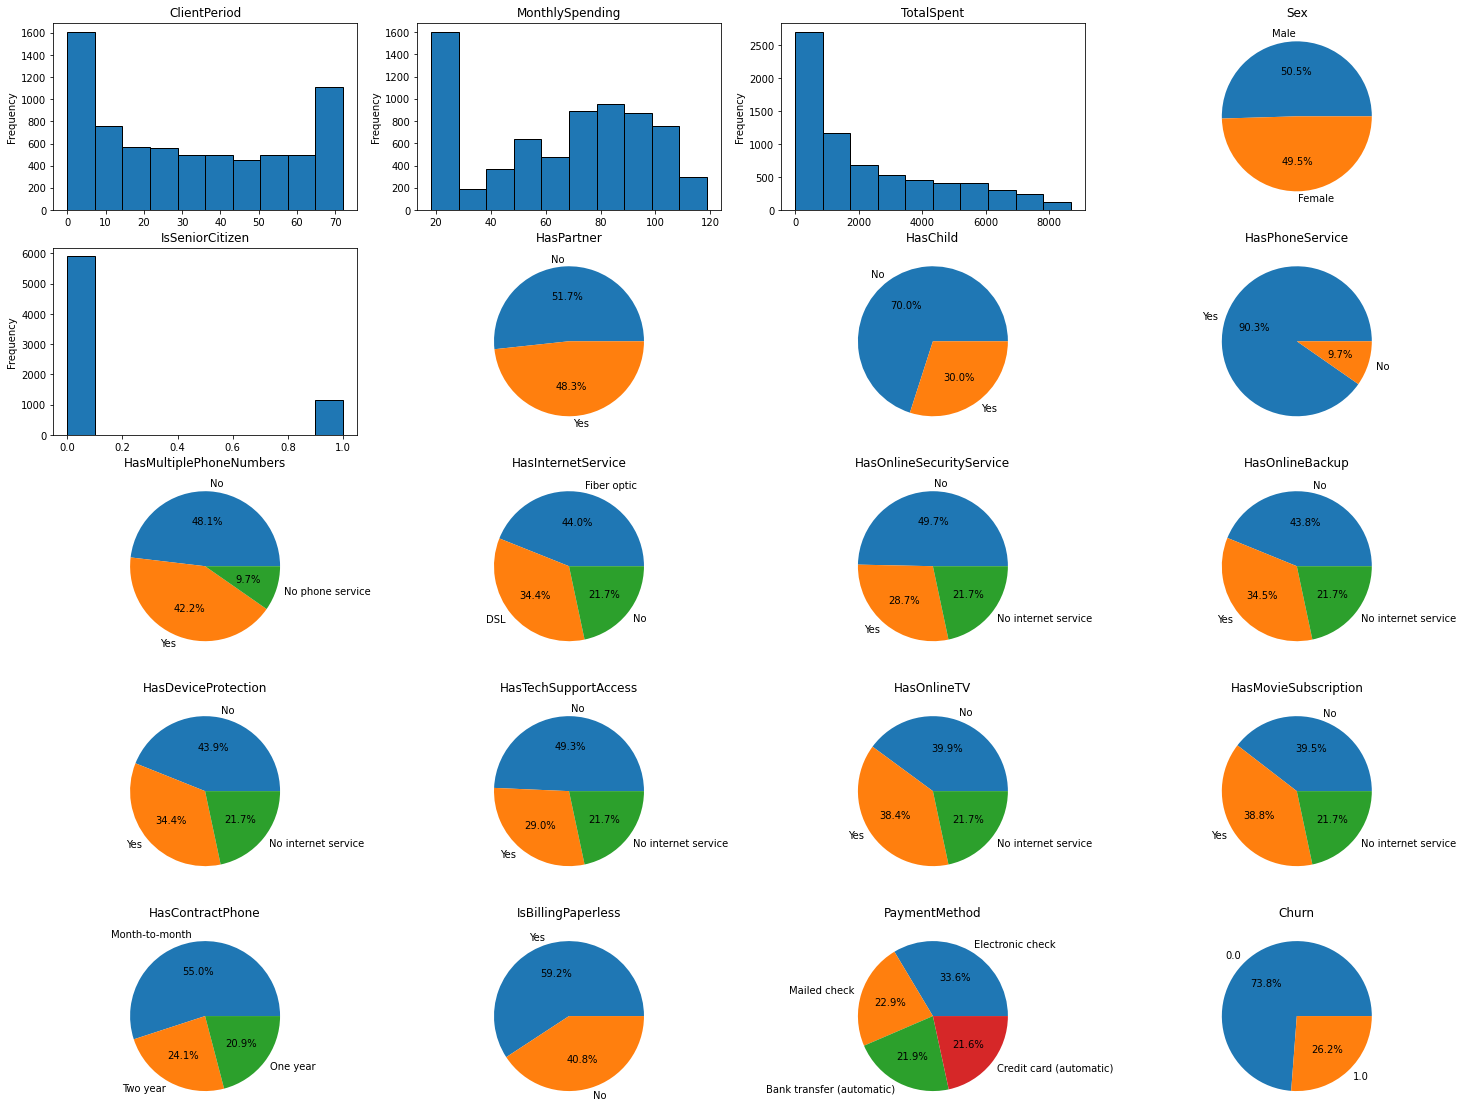

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == 'Churn':
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

Посмотрим на ряд основных статистик

In [ ]:
data1.describe(include='number')

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.159409,0.262022
std,24.550326,30.176464,2269.049195,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [ ]:
data1.describe(include='object')

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


Получается, что типичным клиентом телеком компании является неженатый мужчина, у него услуги связи с одной телефонной линией и оптоволоконный интернет без допуслуг. Использует ежемесячную оплату через Electronic check.

В среднем услугами компании пользуются 2.8 года, тратя в месяц 65$.

Посмотрим на распределение в зависимости от оттока клиента:

In [ ]:
data1.groupby('Churn')[['MonthlySpending', 'TotalSpent', 'ClientPeriod']].mean()

,MonthlySpending,TotalSpent,ClientPeriod
Churn,,,
0,61.602719,2557.914469,37.525911
1,74.281178,1525.831864,17.951590


Можно сделать вывод, что клиенты, отказавшиеся от услуг, тратили в месяц больше и пользовались услугами меньшее время. Ежемесячный чек может быть больше только в том случае, если пользователь потреблял больше услуг. В то же время качество предоставляемых услуг, как и их стоимость, являются одними из ключевых факторов влияющих на лояльность клиента.

Проверим данные на выбросы:

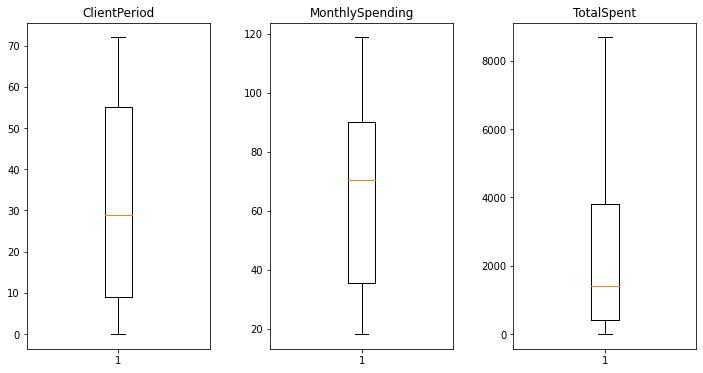

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.33, hspace=0.45)

for i, column in enumerate(num_cols):
    if column == "IsSeniorCitizen":
      break
    ax = axs[i]
    ax.boxplot(data1[column], showfliers=True)
    ax.set_title(column)    
        
plt.show()

Выбросов нет.

Согласно диаграмме 'Churn' целевой переменной, **сильно несбалансированного класса нет**. \\
Заменим бинарные категориальные признаки на 0 и 1, и посмотрим на корреляции:



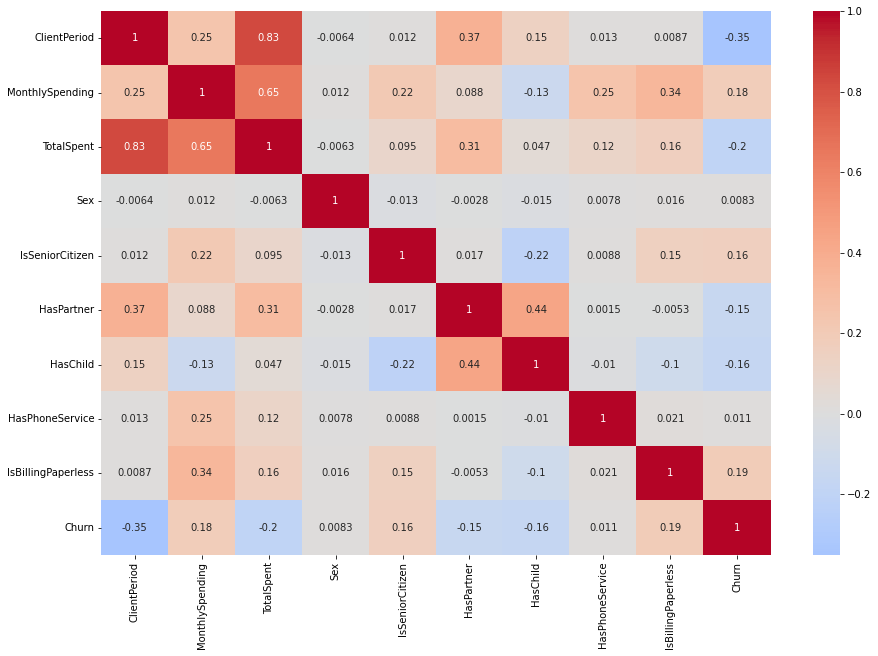

In [ ]:
patterns = {
    'No': 0,
    'Yes': 1,
    'Male': 0,
    'Female': 1,
}
false_cat_cols = ['Sex',
                 'HasPartner',
                  'HasChild',
                  'HasPhoneService',
                  'IsBillingPaperless' 
]

data1[false_cat_cols] = data1[false_cat_cols].replace(patterns)
data2[false_cat_cols] = data2[false_cat_cols].replace(patterns)
X_train = data1.drop('Churn', axis=1)
y_train = data1['Churn']
X_test = data2
data = pd.concat([X_train, y_train], axis=1)
sns.heatmap(data.corr(),
            annot=True,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(15,10))[1]);

Переобозначим колонки в списках

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]

cat_cols = ['HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Применение линейных моделей

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

***LogisticRegression***\
1) Создадим pipeline с кодированием категориальных и нормировкой числовых данных\
2) Найдем оптимальные параметры через GridSearchCV

In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
mapper = DataFrameMapper(
    [(d, LabelEncoder()) for d in cat_cols]
)

ppl = Pipeline(steps=[("mapper", mapper),
                      ("onehot", OneHotEncoder()),
                      ('scaler', StandardScaler(with_mean=False)),
                      ('model', LogisticRegression(fit_intercept=True,
                                                   solver = 'saga',
                                                   max_iter=1000,
                                                   random_state=69)),
                      ])
grid = {
    'model__C': [0.01], #[200, 150, 100, 50, 10, 1, 0.1, 0.01, 0.001],
    'model__penalty': ['l2'], #['l1', 'l2'],
}

grid_search = GridSearchCV(
    estimator=ppl,
    param_grid= grid,
    n_jobs=-1,
    scoring='roc_auc',
    error_score='raise',
    cv=7,
    refit=True
)
Mlogreg = grid_search.fit(X_train,y_train)

Лучшие параметры и score 

In [ ]:
print(Mlogreg.best_score_)
print(Mlogreg.best_params_)

0.827339936703667
{'model__C': 0.01, 'model__penalty': 'l2'}


Сабмит на kaggle

In [ ]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = Mlogreg.predict_proba(X_test)[:, 1]
submission.to_csv('./logreg.csv', index = False)

Лучшие параметры *LogisticRegression*: \
'C': 0.01\
'model__penalty': 'l2'\
**Score на train'е:** 0.82733\
**Score на test'е** (Kaggle): 0.82530

## Применение градиентного бустинга

In [ ]:
!pip install catboost
import catboost

Разобьем выборку и посмотрим на ROC-AUC кривую с стандартными параметрами catboostClassifier

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr,  y_t = train_test_split(X_train, y_train, random_state=69,test_size=0.2)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features = cat_cols)
boosting_model.fit(X_tr, y_tr, silent = True)

y_train_predicted = boosting_model.predict_proba(X_tr)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_t)[:, 1]

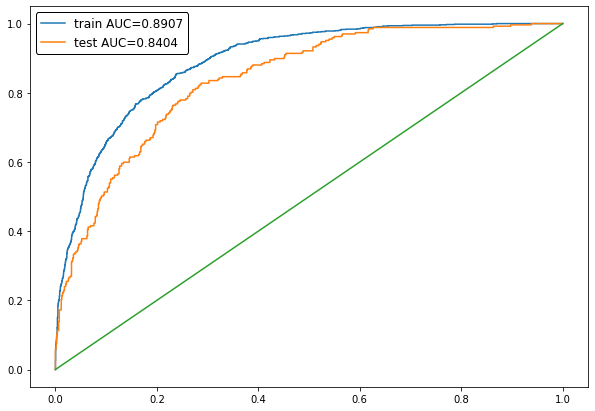

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_tr, y_train_predicted)
test_auc = roc_auc_score(y_t, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_tr, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_t, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Попробуем найти оптимальные параметры через GridSearch для catboostclassifier

In [ ]:
from catboost import CatBoost
Mcatboost = catboost.CatBoostClassifier(cat_features = cat_cols,
                                        eval_metric='AUC:hints=skip_train~false',
                                        silent = True)

grid = {
        "n_estimators": [60], #[60,100,150,200,250,300], 
        "learning_rate": [0.1], #[0.01,0.05,0.1,0.2],
        "max_depth": [4], #[3,4,5],  
        "l2_leaf_reg": [8], #[6,8,10,12],  
        }

grid_search_result = Mcatboost.grid_search(grid, 
                                       cv=5,
                                       X=X_train, 
                                       y=y_train,
                                       plot=True,
                                       refit = True,)


In [ ]:
print(Mcatboost.best_score_)
print(Mcatboost.get_params())

{'learn': {'Logloss': 0.4054972465831746, 'AUC': 0.8534538239559638}}
{'silent': True, 'eval_metric': 'AUC:hints=skip_train~false', 'cat_features': ['HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'PaymentMethod'], 'depth': 4, 'l2_leaf_reg': 8, 'iterations': 60, 'learning_rate': 0.1}


Лучшие параметры *CatBoost*: \
'depth': 4, \
  'l2_leaf_reg': 8,\
  'iterations': 60,\
  'learning_rate': 0.1\
**Score на train'е:** 0.85345\
**Score на test'е** (Kaggle): 0.84539

In [ ]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = Mcatboost.predict_proba(X_test)[:, 1]
submission.to_csv('./cat.csv', index = False)

## Random Forest и KNN


Попробуем другие модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
#Random Forest
mapper = DataFrameMapper(
    [(d, LabelEncoder()) for d in cat_cols]
)


ppl = Pipeline(steps=[("mapper", mapper),
                      ("onehot", OneHotEncoder()),
                      ('model',RandomForestClassifier(n_estimators=100,
                                                      random_state=69)),])

grid = {
    "model__min_samples_split": [2], #range(2,20,2),
    "model__min_samples_leaf": [18], #range(2,20,2),
}

grid_search = GridSearchCV(estimator = ppl,
                           param_grid=grid,
                           scoring="roc_auc",
                           cv=5, refit=True, n_jobs=-1)
Mrf = grid_search.fit(X_train, y_train)




In [ ]:
print(Mrf.best_score_)
print(Mrf.best_params_)

0.8262977928481432
{'model__min_samples_leaf': 18, 'model__min_samples_split': 2}


In [ ]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = Mrf.predict_proba(X_test)[:, 1]
submission.to_csv('./MRS.csv', index = False)

Лучшие параметры *Random Forest*: \
'min_samples_leaf': 18\
'min_samples_split': 2\
**Score на train'е:** 0.82629\
**Score на test'е** (Kaggle): 0.82255

In [ ]:
#KNN
mapper = DataFrameMapper(
    [(d, LabelEncoder()) for d in cat_cols]
)


ppl = Pipeline(steps=[("mapper", mapper),
                      ("onehot", OneHotEncoder()),
                      ('scaler', StandardScaler(with_mean=False)),
                      ('model',KNeighborsClassifier()),])
grid = {
    "model__n_neighbors": [160], #range(0,161,20),
    "model__metric": ["cosine"], #["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"],
}
grid_search = GridSearchCV(
    estimator=ppl,
    param_grid=grid,
    scoring="roc_auc",
    n_jobs=-1,
    error_score='raise',
    cv=7,
    refit=True,
)
knn = grid_search.fit(X_train, y_train)

In [ ]:
print(knn.best_score_)
print(knn.best_params_)

0.8187039892715161
{'model__metric': 'cosine', 'model__n_neighbors': 160}


In [ ]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = knn.predict_proba(X_test)[:, 1]
submission.to_csv('./KNN.csv', index = False)

Лучшие параметры *KNN*: \
'model__metric': 'cosine' 

'model__n_neighbors': 160\
**Score на train'е:** 0.81870\
**Score на test'е** (Kaggle): 0.81663

# Предсказания

Сделаем ансамбль из всех моделей

In [ ]:
from catboost import CatBoostClassifier
meta = CatBoostClassifier(
    logging_level='Silent',
    eval_metric="AUC:hints=skip_train~false",
    metric_period=1000,
    subsample=0.1,
)
stack = StackingClassifier(
    estimators=[
        ("Mlogreg", Mlogreg),
        ("knn", knn),
        ("Mrf", Mrf),
        ("Mcatboost", Mcatboost),
    ],
    final_estimator=meta,
    n_jobs=-1,
)

stack.fit(X_train, y_train)

In [ ]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = stack.predict_proba(X_test)[:, 1]
submission.to_csv('/content/drive/MyDrive/final_paiphs.csv', index = False)

# **Итоговый результат на kaggle:**
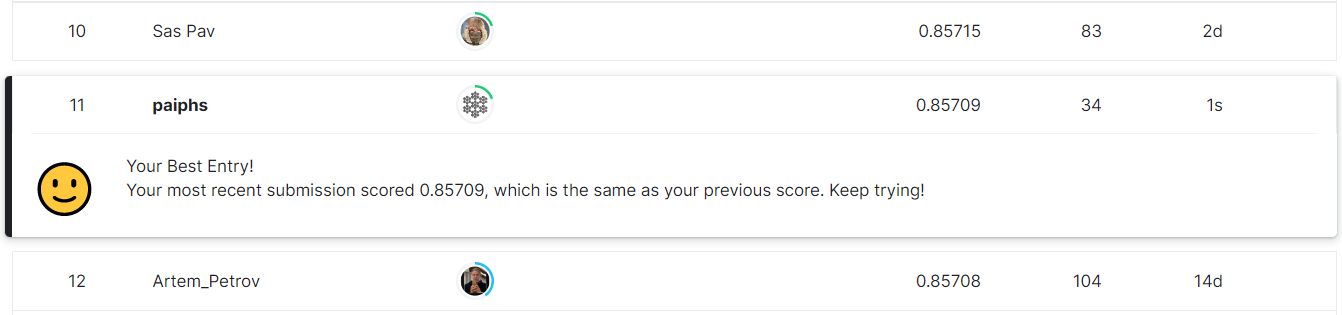